In [1]:
## Import all the necessary libraries 

import warnings
warnings.filterwarnings('ignore') # ignore any warnings 

# import all data utilities 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from scipy.stats import ks_2samp
from scipy.stats import entropy
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# import all the various classifier models 
#import xgboost
import xgboost as xgb
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
def get_transformed_data(sub_df):
    
    return sub_df

In [3]:
def setplotParams():
    # Set the plot params

    plt.rcParams["figure.figsize"] = [9, 5]
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.labelsize"] = 10
    plt.rcParams["axes.titlepad"] = 8
    plt.rcParams["axes.facecolor"] = "white"
    plt.rcParams["axes.linewidth"] = 0.3
    plt.rcParams["axes.grid"] = True
    plt.rcParams["grid.color"] = "green"
    plt.rcParams["grid.linestyle"] = "--"
    plt.rcParams["grid.linewidth"] = 0.2
    plt.rcParams["xtick.labelsize"] = 6
    plt.rcParams["ytick.labelsize"] = 6
    plt.rcParams["legend.fontsize"] = 7
    plt.rcParams["legend.labelspacing"] = 1
    plt.rcParams["lines.linewidth"] = 0.5
    

In [4]:
real_filepath = '../Real Datasets/Anomaly Detection/Participants_Data_WH18/anomaly.csv'
#synthetic_filepath = '../Synthetic Datasets/sdv_gauss/sdv_gauss_anomaly.csv'
#synthetic_filepath = '../Synthetic Datasets/sdv_ctgan/sdv_ctgan_anomaly_100.csv'
#synthetic_filepath = '../Synthetic Datasets/sdv_copula/sdv_copula_anomaly.csv'
synthetic_filepath = '../Synthetic Datasets/sdv_tvae/sdv_tvae_anomaly_300.csv'

real_df = pd.read_csv(real_filepath, nrows=2000)
real_df.drop('Unnamed: 0', inplace=True, axis = 1)
synthetic_df = pd.read_csv(synthetic_filepath)
synthetic_df.drop(columns={'Unnamed: 0', 'Unnamed: 0.1'}, inplace=True, axis=1)

rtrf_df = get_transformed_data(real_df)
strf_df = get_transformed_data(synthetic_df)
strf_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 1559 entries, feature_1 to Class
dtypes: float64(5), int64(1554)
memory usage: 23.8 MB


In [5]:
z_col = 0
for col in real_df:
    if real_df[col].sum()==0:
        z_col += 1
print('Number of columns in real dataset with only one categorical (constant) values are '+str(z_col))
z_col = 0
for col in synthetic_df:
    if synthetic_df[col].sum()==0:
        z_col += 1
print('Number of columns in synthetic dataset with only one categorical (constant) values are '+str(z_col))

Number of columns in real dataset with only one categorical (constant) values are 22
Number of columns in synthetic dataset with only one categorical (constant) values are 1504


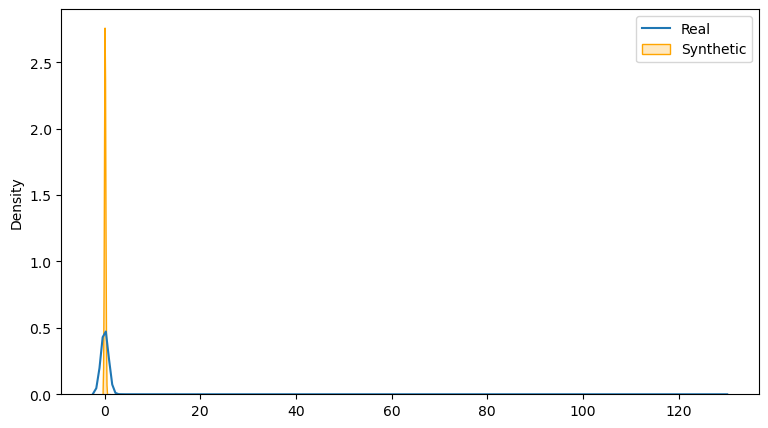

In [6]:
fig = plt.figure(figsize=(9,5))
sns.kdeplot(rtrf_df.mean(), legend=True, label='Real')
sns.kdeplot(strf_df.mean(), color='orange', fill=True, legend=True, label='Synthetic')
plt.legend()
plt.show()


In [7]:
rtrf_df['Class'].value_counts()

0.0    1857
1.0     143
Name: Class, dtype: int64

In [8]:
strf_df['Class'].value_counts()

0.0    2000
Name: Class, dtype: int64

Text(0, 0.5, 'Count')

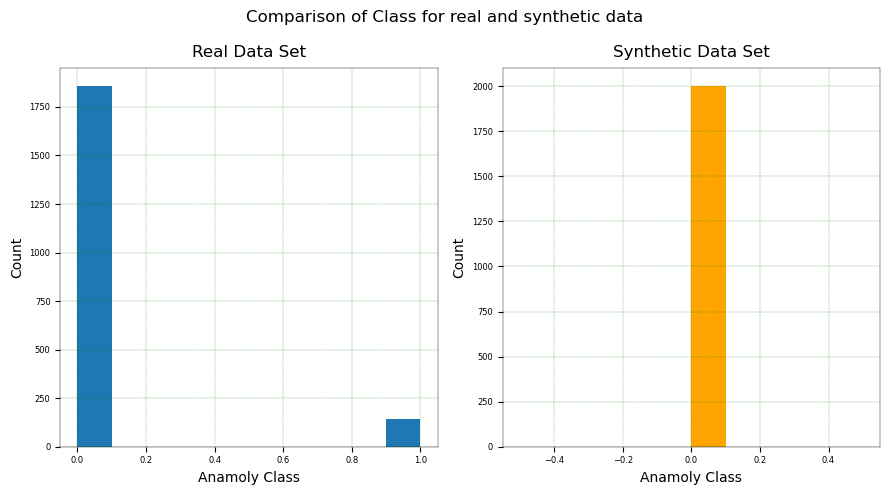

In [9]:
setplotParams()

fig, (axes0, axes1) = plt.subplots(1,2)
fig.suptitle('Comparison of Class for real and synthetic data')

axes0.hist(real_df['Class'], rwidth=1)
axes0.set_title('Real Data Set')
axes0.set_xlabel('Anamoly Class')
axes0.set_ylabel('Count')

axes1.hist(synthetic_df['Class'], color='orange')
axes1.set_title('Synthetic Data Set')
axes1.set_xlabel('Anamoly Class')
axes1.set_ylabel('Count')


In [10]:
# Percentage of class variables 
real_len = len(real_df)
survival_per = (real_len - (real_df['Class'].value_counts()[0]))/real_len
print('Anamoly percentage in real dataset '+str(survival_per*100)+' %')

Anamoly percentage in real dataset 7.1499999999999995 %


In [11]:
synth_len = len(synthetic_df)
survival_per = (synth_len - (synthetic_df['Class'].value_counts()[0]))/synth_len
print('Anamoly percentage in synthetic dataset '+str(survival_per*100)+' %')

Anamoly percentage in synthetic dataset 0.0 %


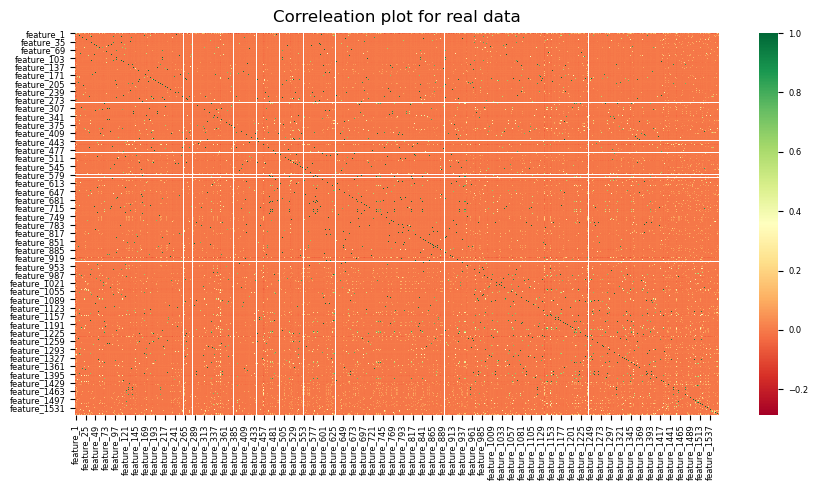

In [12]:
corrmat=rtrf_df.corr()
top_corr_features=corrmat.index

syn_corr = strf_df.corr()
top_corr_features_syn =syn_corr.index

plt.title('Correleation plot for real data')
#fig, axes = plt.subplots(1,2) # 1 row and 2 column
#fig.suptitle('Correleation plot for real and synthetic data')

#axes[0].set_title('Real Data Set')
g1=sns.heatmap(real_df[top_corr_features].corr(),annot=False, annot_kws={'fontsize':'xx-small'}, cmap='RdYlGn')
#axes[1].set_title('Synthetic Data Set')


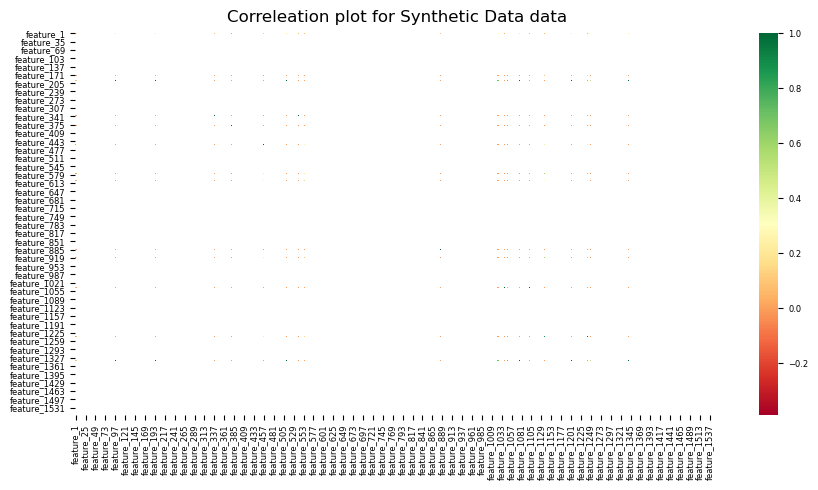

In [13]:
plt.title('Correleation plot for Synthetic Data data')
g2=sns.heatmap(synthetic_df[top_corr_features_syn].corr(),annot=False, annot_kws={'fontsize':'xx-small'}, cmap='RdYlGn')


Text(0, 0.5, 'Feature')

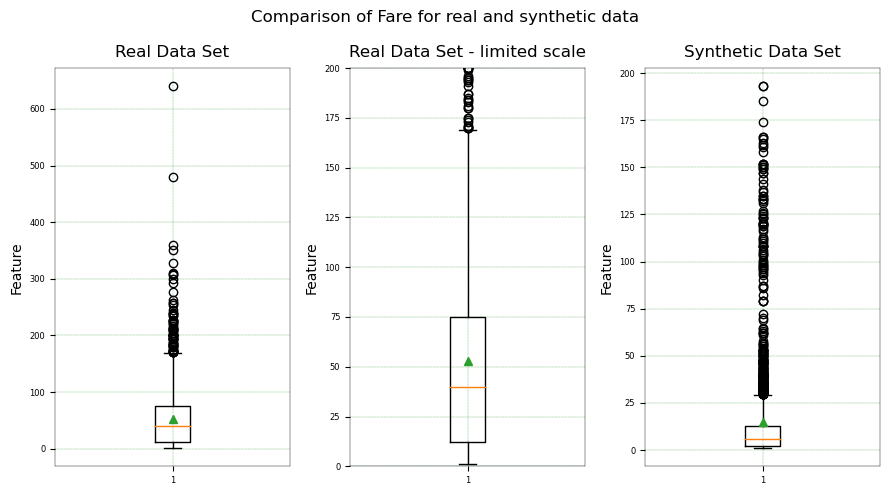

In [14]:
setplotParams()
fig, (axes0, axes1, axes2) = plt.subplots(1,3)
fig.suptitle('Comparison of Fare for real and synthetic data')

axes0.boxplot(real_df['feature_1'], showmeans=True)
axes0.set_title('Real Data Set')
axes0.set_ylabel('Feature')
#axes0.set_ylim(0,100)

axes1.boxplot(real_df['feature_1'], showmeans=True)
axes1.set_title('Real Data Set - limited scale')
axes1.set_ylabel('Feature')
axes1.set_ylim(0,200)


axes2.boxplot(synthetic_df['feature_1'],showmeans=True)
axes2.set_title('Synthetic Data Set')
axes2.set_ylabel('Feature')

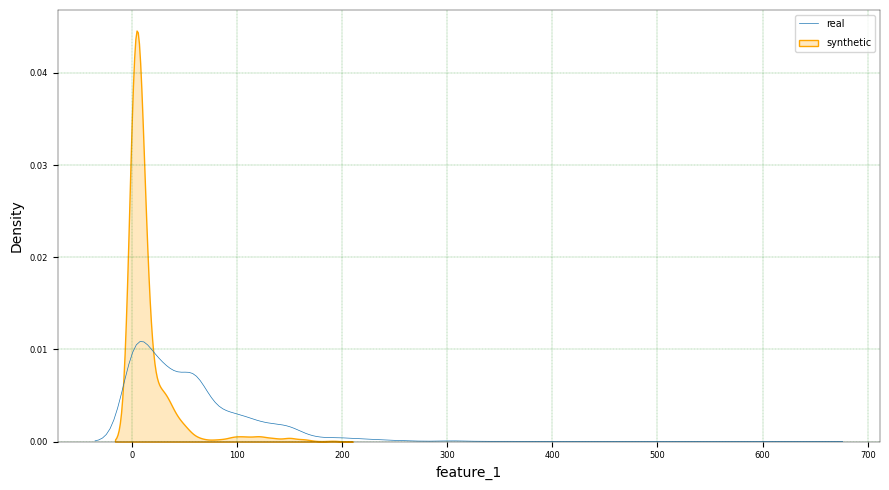

In [15]:
sns.kdeplot(real_df['feature_1'], label ='real', legend=True)
sns.kdeplot(synthetic_df['feature_1'], label ='synthetic', legend=True, fill=True, color='orange')
plt.legend()
plt.show()


### Two-sample Kolmogorov–Smirnov test
Comparesthe Cummulative Distribution Function of the 2 datasets and provides the maximum of the difefrence between the 2 CDF's
It is an indicator that indicates if the data set was drawn from the same sample.. The statistic value must be close to ZERO if the ditribution is the same and pvalue close to 1.  

In [16]:
ks_2samp(real_df['feature_1'], synthetic_df['feature_1'])

KstestResult(statistic=0.4945, pvalue=2.145428485909326e-222)

In [17]:
ks_2samp(real_df['feature_2'], synthetic_df['feature_2'])
#real_df.info()

KstestResult(statistic=0.6435, pvalue=0.0)

In [18]:
ks_2samp(real_df['feature_3'], synthetic_df['feature_3'])

KstestResult(statistic=0.302, pvalue=7.122299589128214e-81)

# KL-divergence

Kullback-Leibler Divergence is the method used to find the difference between 2 probability distribution. It can be used to measure the difference between the observed and the actual probabilities in machne learning. In Python, scipy has a method called relative entropy "rel_entropy" that calculates the KL divergence. 

KL(P||Q) = sum(P[i]*log2(P[i])/Q[i])

In [19]:
def get_distribution_of_categorical_attribute(attribute: pd.Series, indicies=None):
    distribution = attribute.dropna().value_counts()
    if indicies is not None:
        for idx in set(indicies) - set(distribution.index):
            distribution.loc[idx] = 0
    distribution.sort_index(inplace=True)
    return distribution/sum(distribution)

def kl_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for KL-divergence.
    """
    distribution_in = get_distribution_of_categorical_attribute(df_in[attr])
    distribution_out = get_distribution_of_categorical_attribute(df_out[attr], distribution_in.index)
    return entropy(distribution_out, distribution_in)
    return entropy(df_in, df_out)

In [20]:
def consolidate_report(rep, tag):
    rep['Type'] = 0
    rep = rep[list(('Type','feature_1', 'feature_2', 'feature_3'))]
    rep['Type'] = tag
    return rep

In [21]:
# KL divergence using entropy
#kl_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
kl_e = entropy(rtrf_df, strf_df[0:len(rtrf_df)])
result = pd.DataFrame(kl_e).T
cust_rep = pd.DataFrame([result[0], result[1], result[2]]).T
cust_rep.columns= ['feature_1', 'feature_2', 'feature_3']
final_report = consolidate_report(cust_rep, 'Entory')
final_report

,Type,feature_1,feature_2,feature_3
0,Entory,1.436418,2.107451,0.53457


In [22]:
#direct method of calculating KL Divergence using Scipy
from scipy import special

kl = special.kl_div(rtrf_df, strf_df[0:len(rtrf_df)], out=None)
report = pd.DataFrame([[kl['feature_1'].sum(),
         kl['feature_2'].sum(), 
         kl['feature_3'].sum()
        ]])
report.columns= ['feature_1', 'feature_2', 'feature_3']
final_report = final_report.append(consolidate_report(report, 'KL Div'))
final_report

,Type,feature_1,feature_2,feature_3
0,Entory,1.436418,2.107451,0.534570
0,KL Div,211987.707855,803343.107458,4315.999275


In [23]:
# Find Relative Entropy (The formula is same as the real KL Divergence)
re = special.rel_entr(rtrf_df, strf_df[0:len(rtrf_df)], out=None)

rel_report = pd.DataFrame([[re['feature_1'].sum(),
         re['feature_2'].sum(), 
         re['feature_3'].sum() 
        ]])
rel_report.columns= ['feature_1', 'feature_2', 'feature_3']
final_report = final_report.append(consolidate_report(rel_report, 'Relative Entropy'))
final_report

,Type,feature_1,feature_2,feature_3
0,Entory,1.436418,2.107451e+00,0.534570
0,KL Div,211987.707855,8.033431e+05,4315.999275
0,Relative Entropy,288725.707855,1.020045e+06,6883.442975


In [24]:
# Actual KL Divergence formula. Claculating using only 1 feild that is Age for comparison. 
#sum(P[i]*log2(P[i])/Q[i])
#Using it for the real Vs Synthetic Data
q = []
col = 0
import math
kl_df = strf_df[:len(rtrf_df)]
for column in rtrf_df.columns:
   
    kl_df[column].replace(np.nan, 0, inplace=True)
    rtrf_df[column].replace(np.nan, 0, inplace=True)
    

div = 0
q = (rtrf_df['feature_3']/kl_df['feature_3']).astype(float)
#print(math.log2(d[0]))

for i in range(len(rtrf_df)):
    kl = rtrf_df['feature_3'][i]*math.log(q[i])
    div = div + kl
print(div)

6883.4429750064055


The KL Divergence manual calculation matches wwith the outcome of rel_entropy. 

# Calculating Euclidean Distance

In [25]:
# finding sum of squares
def euclidean(rtrf_df, strf_df):
    sum_sq = np.sum(np.square(rtrf_df - strf_df))
    dist = np.sqrt(sum_sq)
    #print('the Euclidean distance between 2 dataframe is : ' +str(dist) )
    return dist

dist = euclidean(rtrf_df, strf_df[0:len(rtrf_df)])
result = pd.DataFrame(dist).T
rep = pd.DataFrame([result['feature_1'], result['feature_2'], 
                    result['feature_3']]).T 
rep.columns= ['feature_1', 'feature_2', 'feature_3']
final_report = final_report.append(consolidate_report(rep, 'Eucledian Distance'))
final_report

,Type,feature_1,feature_2,feature_3
0,Entory,1.436418,2.107451e+00,0.534570
0,KL Div,211987.707855,8.033431e+05,4315.999275
0,Relative Entropy,288725.707855,1.020045e+06,6883.442975
0,Eucledian Distance,3251.049984,7.920399e+03,220.482594


# Calculating Hellinger Distance

This is another meas to measure the probability difference between 2 distributions or 2 variables. The larger the difference separate they are

In [26]:
def hellinger(p, q):
    result = 0 
  # distance between p an d
  # p and q are np array probability distributions
    n = len(p)
    sum = 0.0
    for i in range(n):
        sum += (np.sqrt(p[i]) - np.sqrt(q[i]))**2
        result = (1.0 / np.sqrt(2.0)) * np.sqrt(sum)
    return result

In [27]:
h_dist = hellinger(rtrf_df.to_numpy(), strf_df[0:len(rtrf_df)].to_numpy())

h_result = pd.DataFrame(h_dist).T
h_rep = pd.DataFrame([h_result[0], h_result[1], h_result[2]]).T 
h_rep.columns = ['feature_1', 'feature_2', 'feature_3']

final_report = final_report.append(consolidate_report(h_rep, 'Hellinger Distance'))
final_report

,Type,feature_1,feature_2,feature_3
0,Entory,1.436418,2.107451e+00,0.534570
0,KL Div,211987.707855,8.033431e+05,4315.999275
0,Relative Entropy,288725.707855,1.020045e+06,6883.442975
0,Eucledian Distance,3251.049984,7.920399e+03,220.482594
0,Hellinger Distance,174.077242,3.020669e+02,28.550822


# Testing with model

In [28]:
strf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 1559 entries, feature_1 to Class
dtypes: float64(5), int64(1554)
memory usage: 23.8 MB


In [29]:
y = rtrf_df['Class']
y_synthetic = strf_df['Class']
x = rtrf_df.drop('Class', axis=1)
x_synthetic = strf_df.drop('Class', axis=1)

#modelevaluation.validate_data(x,y,x_synthetic, y_synthetic)

In [30]:
scaler_x = StandardScaler()
X = scaler_x.fit_transform(x)
scaler_xs = StandardScaler()
X_synthetic = scaler_xs.fit_transform(x_synthetic)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_synth_train, X_synth_test, y_synth_train, y_synth_test = train_test_split(X_synthetic, y_synthetic, test_size = 0.3)

In [31]:
xg_class = xgb.XGBClassifier(learning_rate = 0.3, max_depth = 5, n_estimators = 10)
svm_class = svm.SVC(kernel='linear', gamma='auto', C=2)
log_class = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, solver = 'saga')
knn_class = KNeighborsClassifier(n_neighbors= 10, weights='uniform', algorithm='auto', leaf_size=30, p=2, 
                                 metric='minkowski', metric_params=None, n_jobs=None)
dt_class = DecisionTreeClassifier(max_depth = 30, 
                                  random_state=42, 
                                  max_leaf_nodes=15, 
                                  class_weight='balanced')
rf_class = RandomForestClassifier(n_estimators=10,
                                  min_samples_split=2,
                                  min_samples_leaf=1)

classifier_list = [[xg_class, 'XGBoost'], [svm_class, 'SVM'], [log_class,'Logistic'], [knn_class,'KNN'], 
                   [dt_class,'Decission Tree'], [rf_class,'Random Forest']] 

--------------------------------------------------
 Generating report for : XGBoost model
[15:45:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 The Score of the trained model is -- : 0.9528571428571428


 The Prediction Score  is -- : 0.9333333333333333


The Classification Reoprt is :
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       565
         1.0       0.35      0.17      0.23        35

    accuracy                           0.93       600
   macro avg       0.65      0.58      0.60       600
weighted avg       0.92      0.93      0.92       600

The Confusion matrix is 


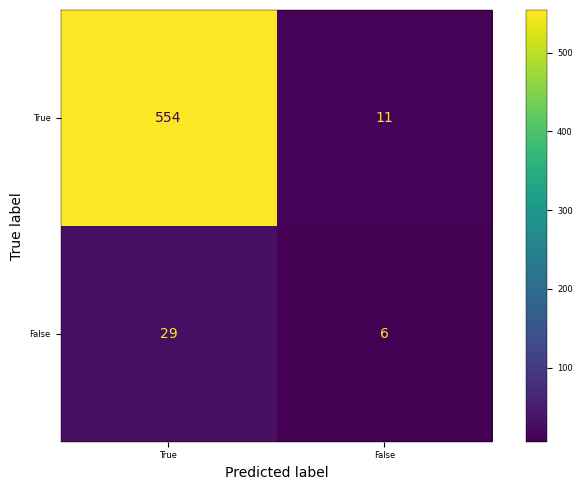

--------------------------------------------------
 Generating report for : SVM model
 The Score of the trained model is -- : 0.9914285714285714


 The Prediction Score  is -- : 0.9166666666666666


The Classification Reoprt is :
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       565
         1.0       0.29      0.29      0.29        35

    accuracy                           0.92       600
   macro avg       0.62      0.62      0.62       600
weighted avg       0.92      0.92      0.92       600

The Confusion matrix is 


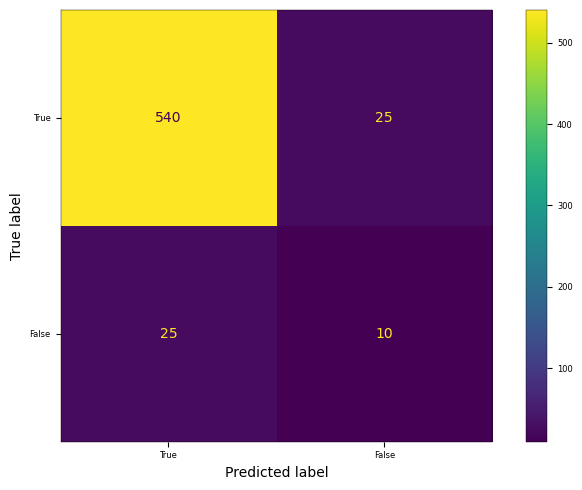

--------------------------------------------------
 Generating report for : Logistic model
 The Score of the trained model is -- : 0.965


 The Prediction Score  is -- : 0.915


The Classification Reoprt is :
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       565
         1.0       0.31      0.37      0.34        35

    accuracy                           0.92       600
   macro avg       0.64      0.66      0.65       600
weighted avg       0.92      0.92      0.92       600

The Confusion matrix is 


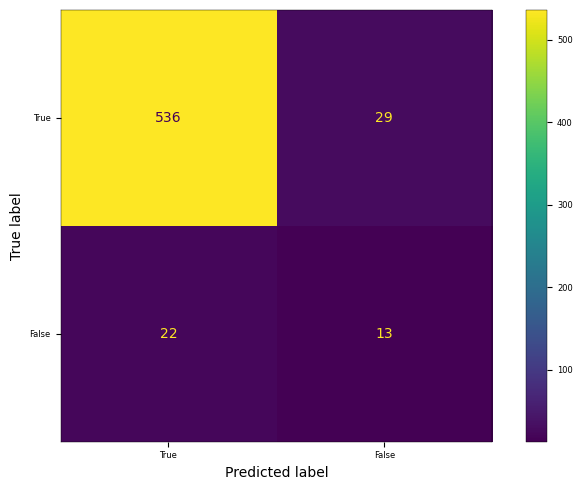

--------------------------------------------------
 Generating report for : KNN model
 The Score of the trained model is -- : 0.9335714285714286


 The Prediction Score  is -- : 0.9383333333333334


The Classification Reoprt is :
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       565
         1.0       0.38      0.09      0.14        35

    accuracy                           0.94       600
   macro avg       0.66      0.54      0.55       600
weighted avg       0.91      0.94      0.92       600

The Confusion matrix is 


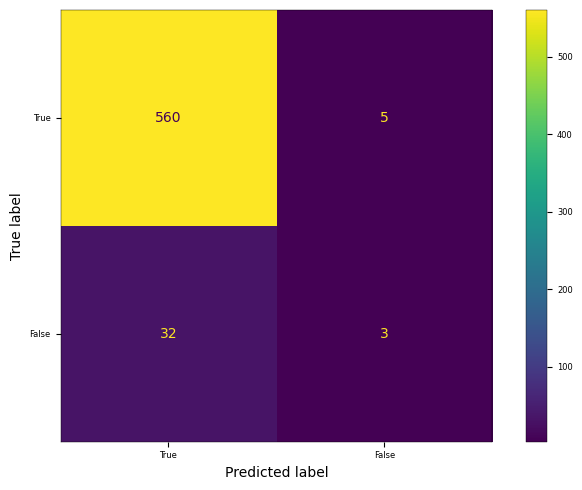

--------------------------------------------------
 Generating report for : Decission Tree model
 The Score of the trained model is -- : 0.8771428571428571


 The Prediction Score  is -- : 0.8783333333333333


The Classification Reoprt is :
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93       565
         1.0       0.29      0.77      0.43        35

    accuracy                           0.88       600
   macro avg       0.64      0.83      0.68       600
weighted avg       0.94      0.88      0.90       600

The Confusion matrix is 


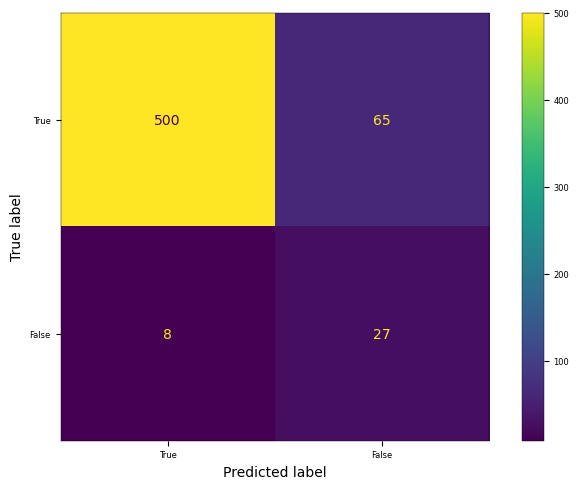

--------------------------------------------------
 Generating report for : Random Forest model
 The Score of the trained model is -- : 0.9885714285714285


 The Prediction Score  is -- : 0.9283333333333333


The Classification Reoprt is :
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       565
         1.0       0.25      0.11      0.16        35

    accuracy                           0.93       600
   macro avg       0.60      0.55      0.56       600
weighted avg       0.91      0.93      0.92       600

The Confusion matrix is 


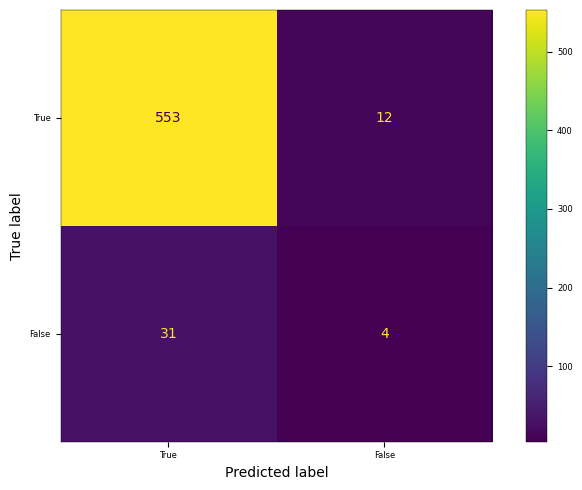

In [32]:
def validate_model(model, classsifier, X_train, X_test, y_train, y_test):
    
    print("--------------------------------------------------")
    print(" Generating report for : " + classsifier + " model")
    model.fit(X_train, y_train)
    result_train = model.score(X_train,y_train)
    print(" The Score of the trained model is -- : " +str(result_train))
    print('\n')
          
    y_predict = model.predict(X_test)
    result_test = model.score(X_test, y_test)
    print(" The Prediction Score  is -- : " +str(result_test))
    print('\n')
    
    print("The Classification Reoprt is :")
    print(classification_report(y_test, y_predict))
    
    print ("The Confusion matrix is ")
    cf_matrix = confusion_matrix(y_test, y_predict)
    #print(cf_matrix)
    cf_display = ConfusionMatrixDisplay(cf_matrix, display_labels = [True, False])
    plt.rcParams["figure.figsize"] = [7, 5]
    plt.rcParams["axes.grid"] = False
    cf_display.plot()
    plt.show()
    
    
for index in classifier_list:
    validate_model(index[0], index[1], X_train, X_test, y_train, y_test)

--------------------------------------------------
 Generating report for : XGBoost model
[15:45:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 The Score of the trained model is -- : 1.0


 The Prediction Score  is -- : 1.0


The Classification Reoprt is :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       600

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

The Confusion matrix is 


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

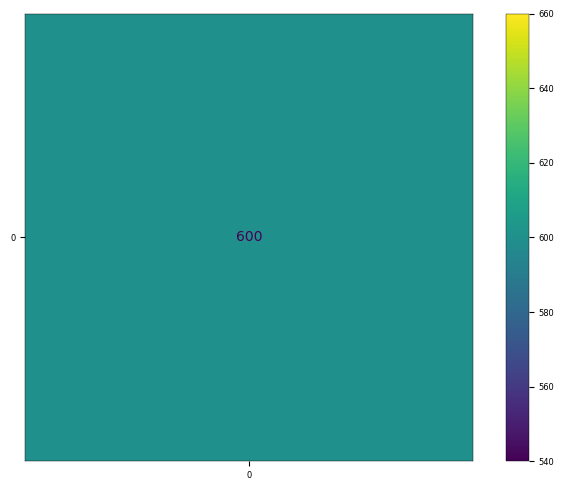

In [33]:
for index in classifier_list:
    validate_model(index[0], index[1], X_synth_train, X_synth_test, y_synth_train, y_synth_test)

# Running the test using the model trained on synthetic data and testing with real data

--------------------------------------------------
 Generating report for : XGBoost model
[15:45:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 The Score of the trained model is -- : 0.9228571428571428


 The Prediction Score  is -- : 0.9416666666666667


The Classification Reoprt is :
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       565
         1.0       0.00      0.00      0.00        35

    accuracy                           0.94       600
   macro avg       0.47      0.50      0.48       600
weighted avg       0.89      0.94      0.91       600

The Confusion matrix is 


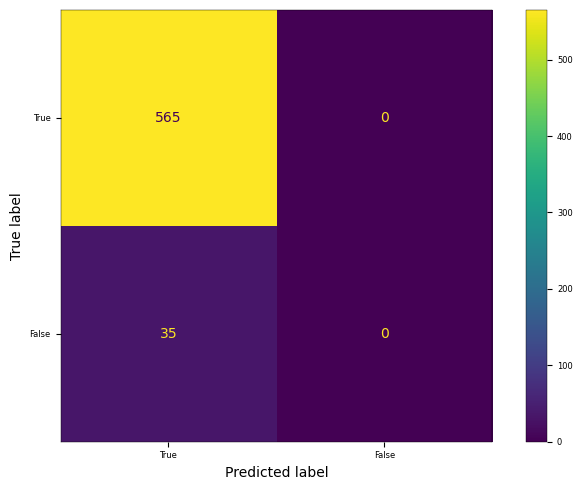

--------------------------------------------------
 Generating report for : SVM model
 The Score of the trained model is -- : 0.9228571428571428


 The Prediction Score  is -- : 0.9416666666666667


The Classification Reoprt is :
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       565
         1.0       0.00      0.00      0.00        35

    accuracy                           0.94       600
   macro avg       0.47      0.50      0.48       600
weighted avg       0.89      0.94      0.91       600

The Confusion matrix is 


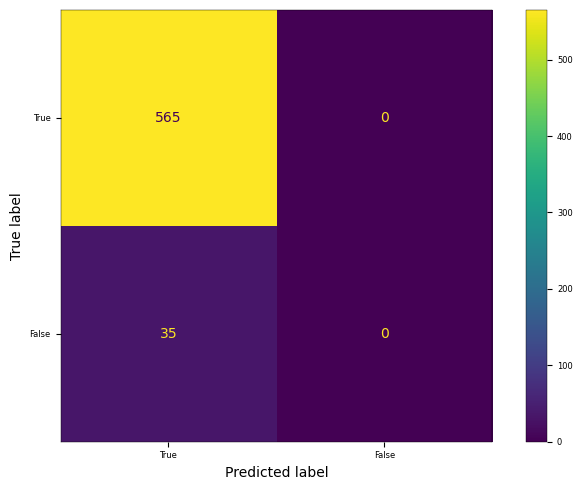

--------------------------------------------------
 Generating report for : Logistic model
 The Score of the trained model is -- : 0.9228571428571428


 The Prediction Score  is -- : 0.9366666666666666


The Classification Reoprt is :
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       565
         1.0       0.00      0.00      0.00        35

    accuracy                           0.94       600
   macro avg       0.47      0.50      0.48       600
weighted avg       0.89      0.94      0.91       600

The Confusion matrix is 


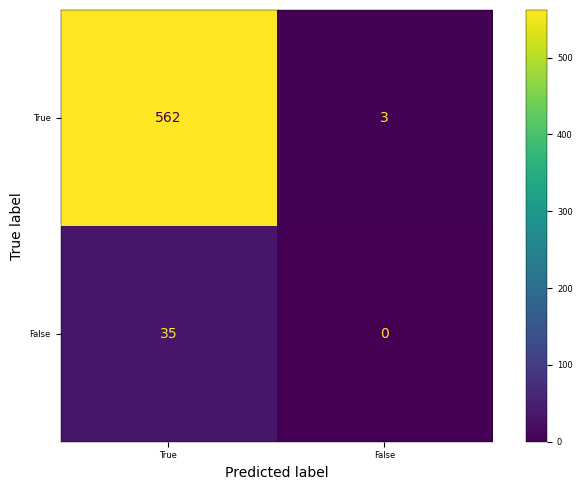

--------------------------------------------------
 Generating report for : KNN model
 The Score of the trained model is -- : 0.9235714285714286


 The Prediction Score  is -- : 0.9416666666666667


The Classification Reoprt is :
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       565
         1.0       0.00      0.00      0.00        35

    accuracy                           0.94       600
   macro avg       0.47      0.50      0.48       600
weighted avg       0.89      0.94      0.91       600

The Confusion matrix is 


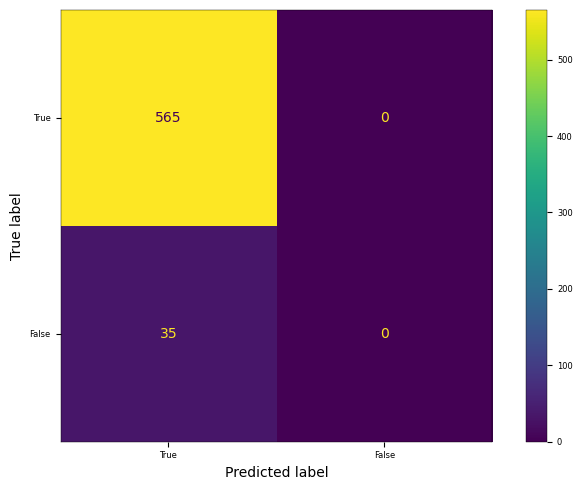

--------------------------------------------------
 Generating report for : Decission Tree model
 The Score of the trained model is -- : 0.6921428571428572


 The Prediction Score  is -- : 0.63


The Classification Reoprt is :
              precision    recall  f1-score   support

         0.0       0.95      0.64      0.77       565
         1.0       0.07      0.43      0.12        35

    accuracy                           0.63       600
   macro avg       0.51      0.54      0.44       600
weighted avg       0.90      0.63      0.73       600

The Confusion matrix is 


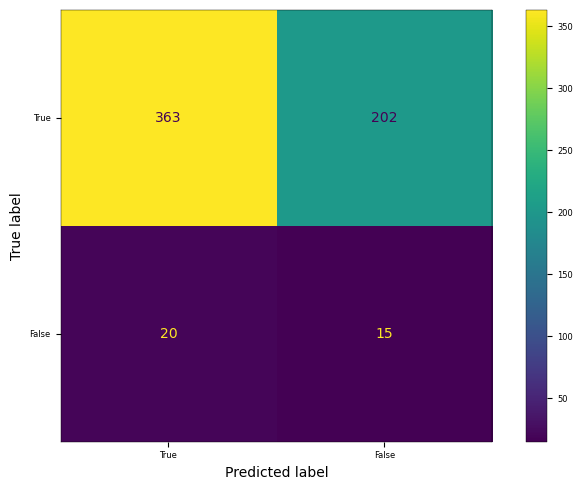

--------------------------------------------------
 Generating report for : Random Forest model
 The Score of the trained model is -- : 0.9764285714285714


 The Prediction Score  is -- : 0.9216666666666666


The Classification Reoprt is :
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       565
         1.0       0.00      0.00      0.00        35

    accuracy                           0.92       600
   macro avg       0.47      0.49      0.48       600
weighted avg       0.89      0.92      0.90       600

The Confusion matrix is 


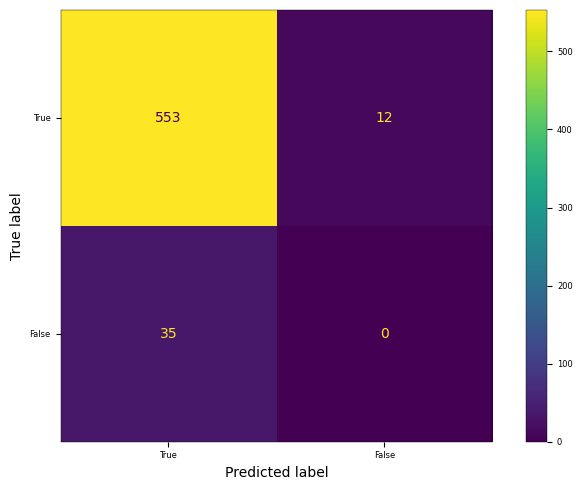

In [34]:
for index in classifier_list:
    validate_model(index[0], index[1], X_synth_train[:len(y_train)], X_synth_test[:len(y_test)], y_train, y_test)

# Plot the ROC and AUC Curves for Synthetic Data and Real Data

In [35]:
# Perform for the Real Dataset
xg_class = xgb.XGBClassifier(learning_rate = 0.3, max_depth = 5, n_estimators = 10)
xg_class.fit(X_train, y_train)
y_prob_xg = xg_class.predict_proba(X_test)[:, -1]
fpr_xg, tpr_xg, t = roc_curve(y_test, y_prob_xg)
xgp, xgr, t = precision_recall_curve(y_test, y_prob_xg)
roc_auc_xg = auc(fpr_xg, tpr_xg)
print("ROC_AUC Score - Real Data XgBoost = " +str(roc_auc_xg))

# Perform for the Synthetic Dataset
xg_class = xgb.XGBClassifier(learning_rate = 0.3, max_depth = 5, n_estimators = 10)
xg_class.fit(X_synth_train, y_synth_train)
y_prob_xg_s = xg_class.predict_proba(X_synth_test)[:, -1]
fpr_xg_s, tpr_xg_s, thresholds = roc_curve(y_synth_test, y_prob_xg_s)
xgps, xgrs, ts = precision_recall_curve(y_synth_test, y_prob_xg_s)
roc_auc_xgs = auc(fpr_xg_s, tpr_xg_s)
print("ROC_AUC Score - Synthetic Data XgBoost = " +str(roc_auc_xgs))

# Perform for the real data trained on Synthetic Dataset
xg_class = xgb.XGBClassifier(learning_rate = 0.3, max_depth = 5, n_estimators = 10)
xg_class.fit(X_synth_train, y_synth_train)
y_prob_xg_rs = xg_class.predict_proba(X_test)[:, -1]
fpr_xg_rs, tpr_xg_rs, thresholds = roc_curve(y_test, y_prob_xg_rs)
xgprs, xgrrs, ts = precision_recall_curve(y_test, y_prob_xg_rs)
roc_auc_xgrs = auc(fpr_xg_rs, tpr_xg_rs)
print("ROC_AUC Score - Trained on Synthetic Data XgBoost = " +str(roc_auc_xgrs))

# Perform for the Real Dataset
dt_class_r = DecisionTreeClassifier(max_depth = 30, 
                                  random_state=42, 
                                  max_leaf_nodes=15, 
                                  class_weight='balanced')
dt_class_r.fit(X_train, y_train)
y_prob_dt = dt_class_r.predict_proba(X_test)[:, -1]
fpr_dt, tpr_dt, t = roc_curve(y_test, y_prob_dt)
dtp, dtr, t = precision_recall_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
print("ROC_AUC Score - Real Data DecisionTree = " +str(roc_auc_dt))

# Perform for the Synthetic Dataset
dt_class_s = DecisionTreeClassifier(max_depth = 30, 
                                  random_state=42, 
                                  max_leaf_nodes=15, 
                                  class_weight='balanced')
dt_class_s.fit(X_synth_train, y_synth_train)
y_prob_dt_s = dt_class_s.predict_proba(X_synth_test)[:, -1]
fpr_dt_s, tpr_dt_s, thresholds = roc_curve(y_synth_test, y_prob_dt_s)
dtps, dtrs, ts = precision_recall_curve(y_synth_test, y_prob_dt_s)
roc_auc_dts = auc(fpr_dt_s, tpr_dt_s)
print("ROC_AUC Score - Synthetic Data DecisionTree = " +str(roc_auc_dts))

# Perform for the real data trained on Synthetic Dataset
dt_class_x = DecisionTreeClassifier(max_depth = 30, 
                                  random_state=42, 
                                  max_leaf_nodes=15, 
                                  class_weight='balanced')
dt_class_x.fit(X_synth_train, y_synth_train)
y_prob_dt_rs = dt_class_x.predict_proba(X_test)[:, -1]
fpr_dt_rs, tpr_dt_rs, thresholds = roc_curve(y_test, y_prob_dt_rs)
dtprs, dtrrs, ts = precision_recall_curve(y_test, y_prob_dt_rs)
roc_auc_dtrs = auc(fpr_dt_rs, tpr_dt_rs)
print("ROC_AUC Score - Trained on Synthetic Data DecisionTree = " +str(roc_auc_dtrs))

# Perform for the Real Dataset
log_class = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, solver = 'saga')
log_class.fit(X_train, y_train)
y_prob_log = log_class.predict_proba(X_test)[:, -1]
fpr_log, tpr_log, t = roc_curve(y_test, y_prob_log)
logp, logr, t = precision_recall_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)
print("ROC_AUC Score - Real Data LogisticClassifier = " +str(roc_auc_log))

# Perform for the Synthetic Dataset
log_class = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, solver = 'saga')
log_class.fit(X_synth_train, y_synth_train)
y_prob_log_s = log_class.predict_proba(X_synth_test)[:, -1]
fpr_log_s, tpr_log_s, thresholds = roc_curve(y_synth_test, y_prob_log_s)
logps, logrs, ts = precision_recall_curve(y_synth_test, y_prob_log_s)
roc_auc_logs = auc(fpr_log_s, tpr_log_s)
print("ROC_AUC Score - Synthetic Data LogisticClassifier = " +str(roc_auc_logs))

# Perform for the real data trained on Synthetic Dataset
log_class = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, solver = 'saga')
log_class.fit(X_synth_train, y_synth_train)
y_prob_log_rs = log_class.predict_proba(X_test)[:, -1]
fpr_log_rs, tpr_log_rs, thresholds = roc_curve(y_test, y_prob_log_rs)
logprs, logrrs, ts = precision_recall_curve(y_test, y_prob_log_rs)
roc_auc_logrs = auc(fpr_log_rs, tpr_log_rs)
print("ROC_AUC Score - Trained on Synthetic Data LogisticClassifier = " +str(roc_auc_logrs))


# Perform for the Real Dataset
knn_class = KNeighborsClassifier(n_neighbors= 10, weights='uniform', algorithm='auto', leaf_size=30, p=2, 
                                 metric='minkowski', metric_params=None, n_jobs=None)
knn_class.fit(X_train, y_train)
y_prob_knn = knn_class.predict_proba(X_test)[:, -1]
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_prob_knn)
knnp, knnr, t = precision_recall_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
print("ROC_AUC Score - Real Data KNNClassifier = " +str(roc_auc_knn))

# Perform for the Synthetic Dataset
knn_class = KNeighborsClassifier(n_neighbors= 10, weights='uniform', algorithm='auto', leaf_size=30, p=2, 
                                 metric='minkowski', metric_params=None, n_jobs=None)
knn_class.fit(X_synth_train, y_synth_train)
y_prob_knn_s = knn_class.predict_proba(X_synth_test)[:, -1]
fpr_knn_s, tpr_knn_s, thresholds = roc_curve(y_synth_test, y_prob_knn_s)
knnps, knnrs, t = precision_recall_curve(y_synth_test, y_prob_knn_s)
roc_auc_knns = auc(fpr_knn_s, tpr_knn_s)
print("ROC_AUC Score - Synthetic Data KNNClassifier = " +str(roc_auc_knns))

# Perform for the real data trained on Synthetic Dataset
knn_class = KNeighborsClassifier(n_neighbors= 10, weights='uniform', algorithm='auto', leaf_size=30, p=2, 
                                 metric='minkowski', metric_params=None, n_jobs=None)
knn_class.fit(X_synth_train, y_synth_train)
y_prob_knn_rs = knn_class.predict_proba(X_test)[:, -1]
fpr_knn_rs, tpr_knn_rs, thresholds = roc_curve(y_test, y_prob_knn_rs)
knnprs, knnrrs, ts = precision_recall_curve(y_test, y_prob_knn_rs)
roc_auc_knnrs = auc(fpr_knn_rs, tpr_knn_rs)
print("ROC_AUC Score - Trained on Synthetic Data KNNClassifier = " +str(roc_auc_knnrs))

rf_class = RandomForestClassifier(n_estimators=10,
                                  min_samples_split=2,
                                  min_samples_leaf=1)
rf_class.fit(X_train, y_train)
y_prob_rf = rf_class.predict_proba(X_test)[:, -1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_prob_rf)
rfp, rfr, t = precision_recall_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print("ROC_AUC Score - Real Data RandomForestClassifier = " +str(roc_auc_rf))

# Perform for the Synthetic Dataset
rf_class = RandomForestClassifier(n_estimators=10,
                                  min_samples_split=2,
                                  min_samples_leaf=1)
rf_class.fit(X_synth_train, y_synth_train)
y_prob_rf_s = rf_class.predict_proba(X_synth_test)[:, -1]
fpr_rf_s, tpr_rf_s, thresholds = roc_curve(y_synth_test, y_prob_rf_s)
rfps, rfrs, ts = precision_recall_curve(y_synth_test, y_prob_rf_s)
roc_auc_rfs = auc(fpr_rf_s, tpr_rf_s)
print("ROC_AUC Score - Synthetic Data RandomForestClassifier = " +str(roc_auc_rfs))

# Perform for the real data trained on Synthetic Dataset
rf_class = RandomForestClassifier(n_estimators=10,
                                  min_samples_split=2,
                                  min_samples_leaf=1)
rf_class.fit(X_synth_train, y_synth_train)
y_prob_rf_rs = rf_class.predict_proba(X_test)[:, -1]
fpr_rf_rs, tpr_rf_rs, thresholds = roc_curve(y_test, y_prob_rf_rs)
rfprs, rfrrs, ts = precision_recall_curve(y_test, y_prob_rf_rs)
roc_auc_rfrs = auc(fpr_rf_rs, tpr_rf_rs)
print("ROC_AUC Score - Trained on Synthetic Data RandomForestClassifier = " +str(roc_auc_rfrs))

[15:45:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC_AUC Score - Real Data XgBoost = 0.8602275600505689
[15:45:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC_AUC Score - Synthetic Data XgBoost = nan
[15:45:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

NameError: name 'knnr' is not defined

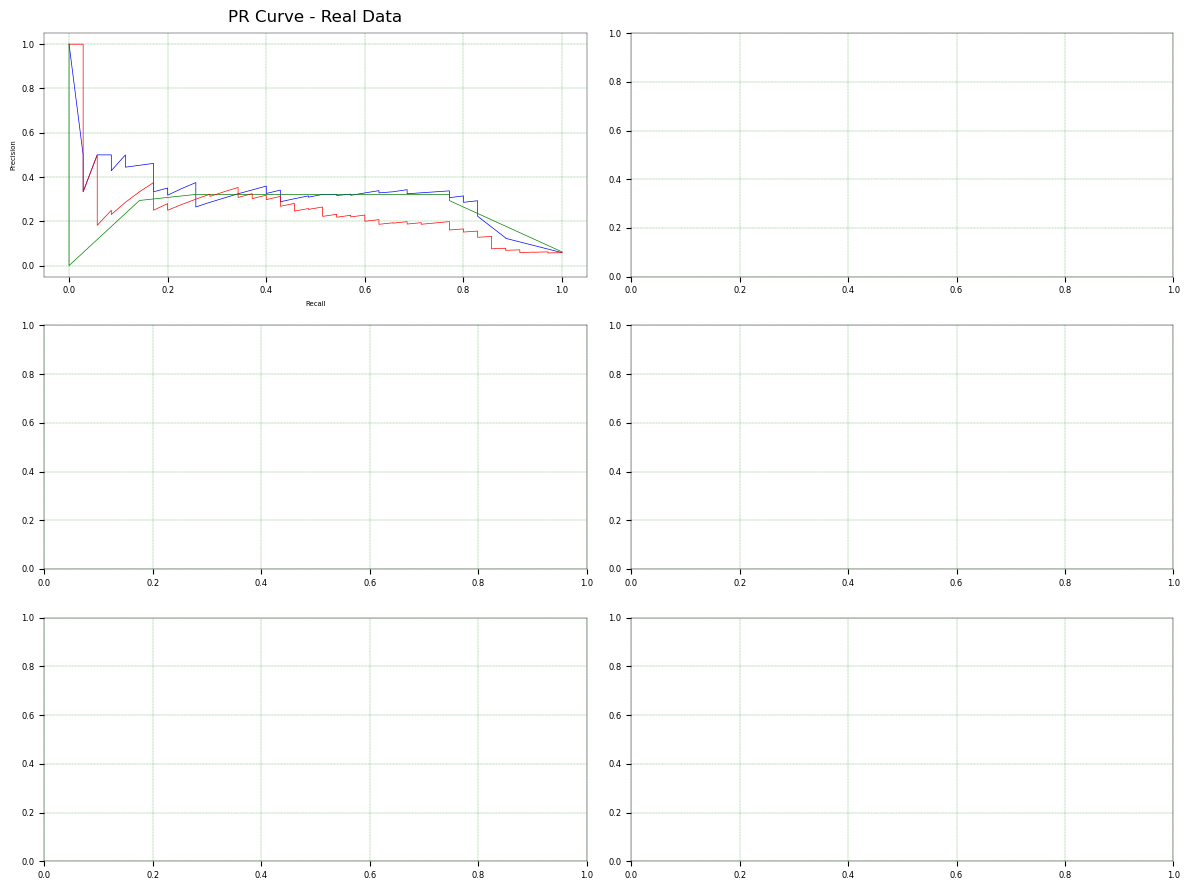

In [36]:

setplotParams()
plt.rcParams["axes.labelsize"] = 5
plt.rcParams["figure.figsize"] = [12, 9]



fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)

ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve - Real Data')
ax1.plot(xgr,xgp,c='blue',label='xg')
ax1.plot(dtr,dtp,c='green',label='dt')
ax1.plot(logr,logp,c='red',label='log')
ax1.plot(knnr,knnp,c='orange',label='knn')
ax1.plot(rfr,rfp,c='black',label='rf')

ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('PR Curve - Synthetic Data')
ax2.plot(xgrs,xgps,c='blue',label='xg')
ax2.plot(dtrs,dtps,c='green',label='dt')
ax2.plot(logrs,logps,c='red',label='log')
ax2.plot(knnrs,knnps,c='orange',label='knn')
ax2.plot(rfrs,rfps,c='black',label='rf')

ax3.set_xlim([-0.05,1.05])
ax3.set_ylim([-0.05,1.05])
ax3.set_xlabel('False Possitive Rate')
ax3.set_ylabel('True Possitive Rate')
ax3.set_title('ROC Curve - Real Data')
ax3.plot(fpr_xg,tpr_xg,c='blue',label='xg')
ax3.plot(fpr_dt,tpr_dt,c='green',label='dt')
ax3.plot(fpr_log,tpr_log,c='red',label='log')
ax3.plot(fpr_knn,tpr_knn,c='orange',label='knn')
ax3.plot(fpr_rf,tpr_rf,c='black',label='rf')

ax4.set_xlim([-0.05,1.05])
ax4.set_ylim([-0.05,1.05])
ax4.set_xlabel('False Possitive Rate')
ax4.set_ylabel('True Possitive Rate')
ax4.set_title('ROC Curve - Synthetic Data')
ax4.plot(fpr_xg_s,tpr_xg_s,c='blue',label='xg')
ax4.plot(fpr_dt_s,tpr_dt_s,c='green',label='dt')
ax4.plot(fpr_log_s,tpr_log_s,c='red',label='log')
ax4.plot(fpr_knn_s,tpr_knn_s,c='orange',label='knn')
ax4.plot(fpr_rf_s,tpr_rf_s,c='black',label='rf')

ax5.set_xlim([-0.05,1.05])
ax5.set_ylim([-0.05,1.05])
ax5.set_xlabel('False Possitive Rate')
ax5.set_ylabel('True Possitive Rate')
ax5.set_title('ROC Curve - Real Data')
ax5.plot(fpr_xg,tpr_xg,c='blue',label='xg')
ax5.plot(fpr_dt,tpr_dt,c='green',label='dt')
ax5.plot(fpr_log,tpr_log,c='red',label='log')
ax5.plot(fpr_knn,tpr_knn,c='orange',label='knn')
ax5.plot(fpr_rf,tpr_rf,c='black',label='rf')

ax6.set_xlim([-0.05,1.05])
ax6.set_ylim([-0.05,1.05])
ax6.set_xlabel('False Possitive Rate')
ax6.set_ylabel('True Possitive Rate')
ax6.set_title('ROC Curve - Trained on Synthetic Data')
ax6.plot(fpr_xg_rs,tpr_xg_rs,c='blue',label='xg')
ax6.plot(fpr_dt_rs,tpr_dt_rs,c='green',label='dt')
ax6.plot(fpr_log_rs,tpr_log_rs,c='red',label='log')
ax6.plot(fpr_knn_rs,tpr_knn_rs,c='orange',label='knn')
ax6.plot(fpr_rf_rs,tpr_rf_rs,c='black',label='rf')


ax1.legend(loc='upper right')    
ax2.legend(loc='upper right')
ax3.legend(loc='lower right')
ax4.legend(loc='lower right')
ax5.legend(loc='lower right')
ax6.legend(loc='lower right')

plt.show()